<a href="https://colab.research.google.com/github/YiyoMb/extraccion-conocimiento-bd/blob/main/notebooks/03_modelo_agrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Librerías importadas para clustering
✅ Datos cargados: (541909, 8)

📝 1. JUSTIFICACIÓN DEL ALGORITMO DE AGRUPACIÓN

ALGORITMO SELECCIONADO: K-MEANS CLUSTERING

✅ VENTAJAS DE K-MEANS:
• Simplicidad y eficiencia computacional
• Funciona bien con clusters esféricos y de tamaño similar
• Fácil interpretación de resultados
• Escalable para datasets grandes
• Implementación robusta y estable

✅ JUSTIFICACIÓN PARA SEGMENTACIÓN DE CLIENTES:
• Los datos de clientes tienden a formar grupos naturales basados en:
  - Frecuencia de compra (RFM Analysis)
  - Monto total gastado
  - Tipos de productos comprados
  - Patrones temporales de compra

✅ MÉTRICA RFM IMPLEMENTADA:
• R (Recency): Qué tan reciente fue la última compra
• F (Frequency): Qué tan frecuentemente compra el cliente
• M (Monetary): Cuánto dinero gasta el cliente

✅ CRITERIOS DE EVALUACIÓN:
• Método del Codo (Elbow Method) para determinar K óptimo
• Puntuación de Silhouette para validar calidad de clusters
• Análisis de inercia (With

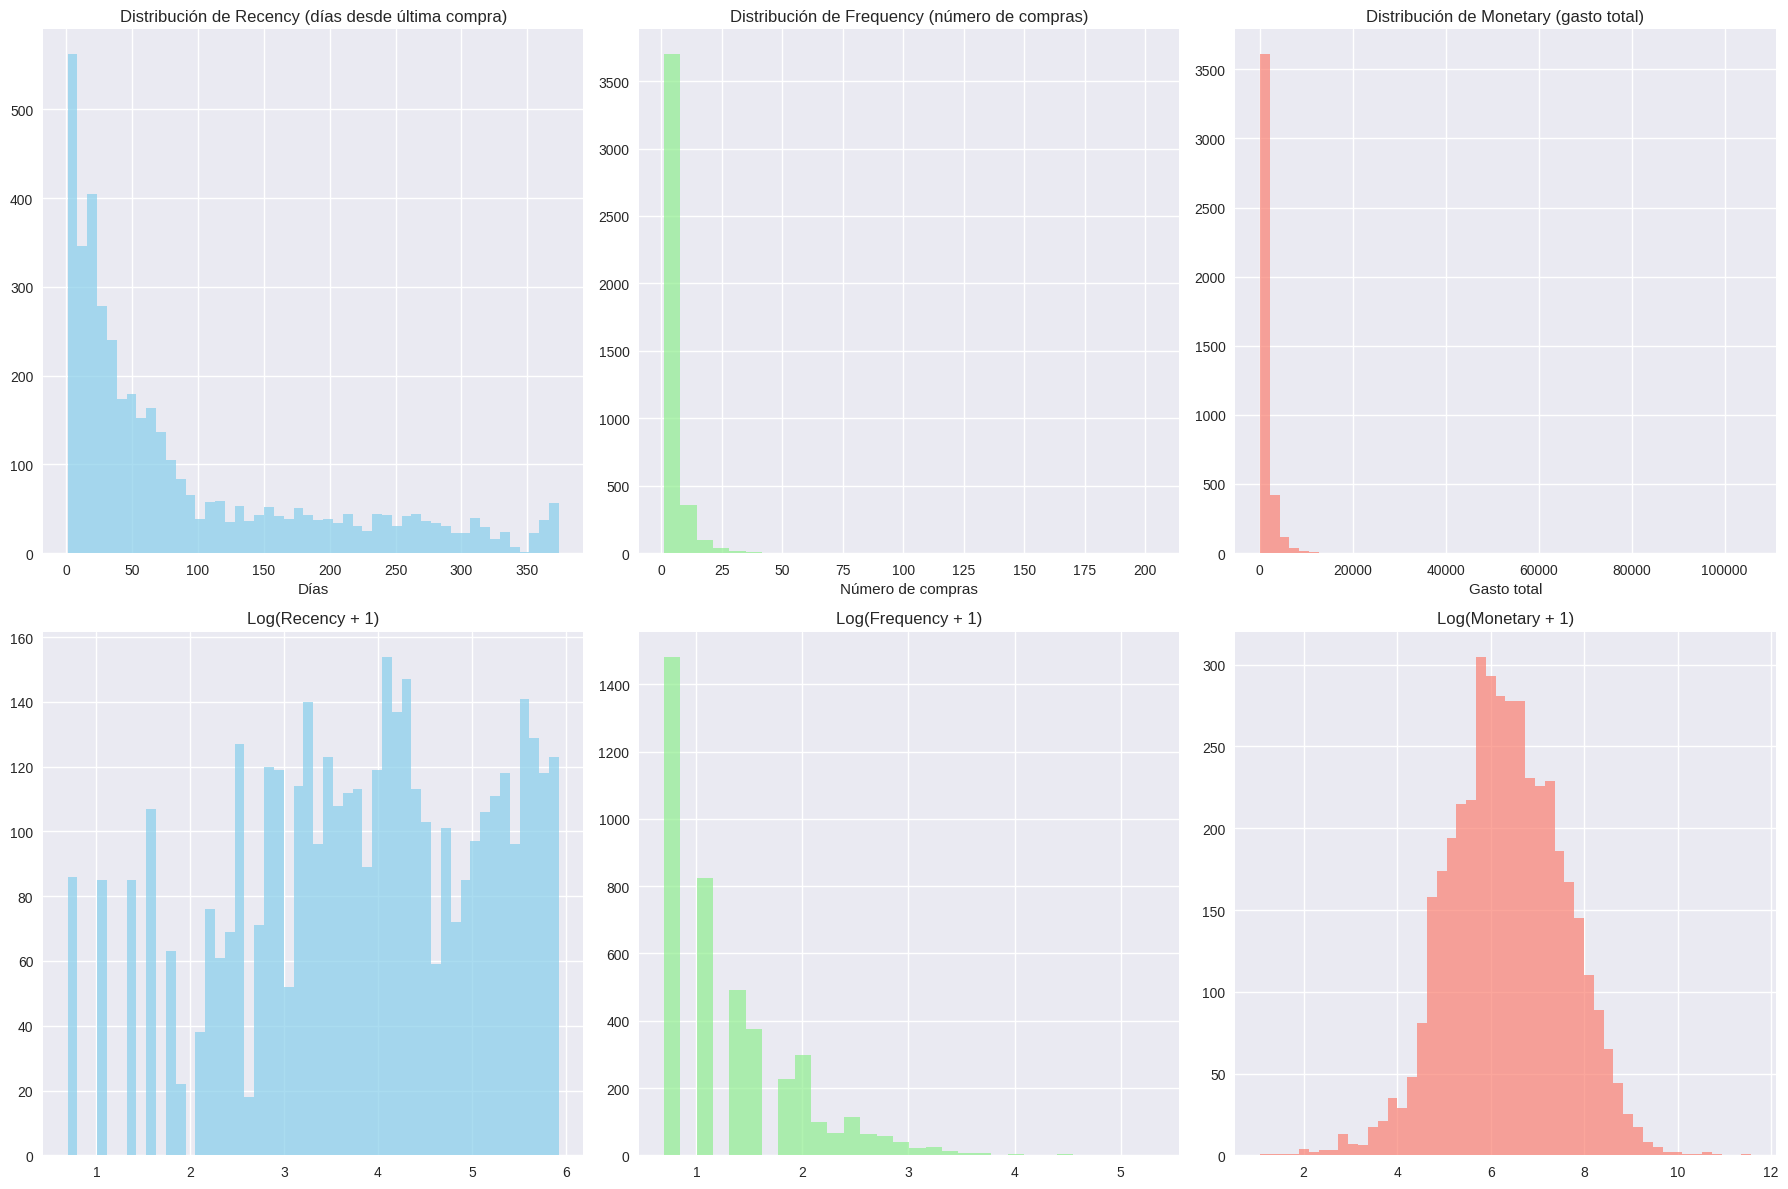

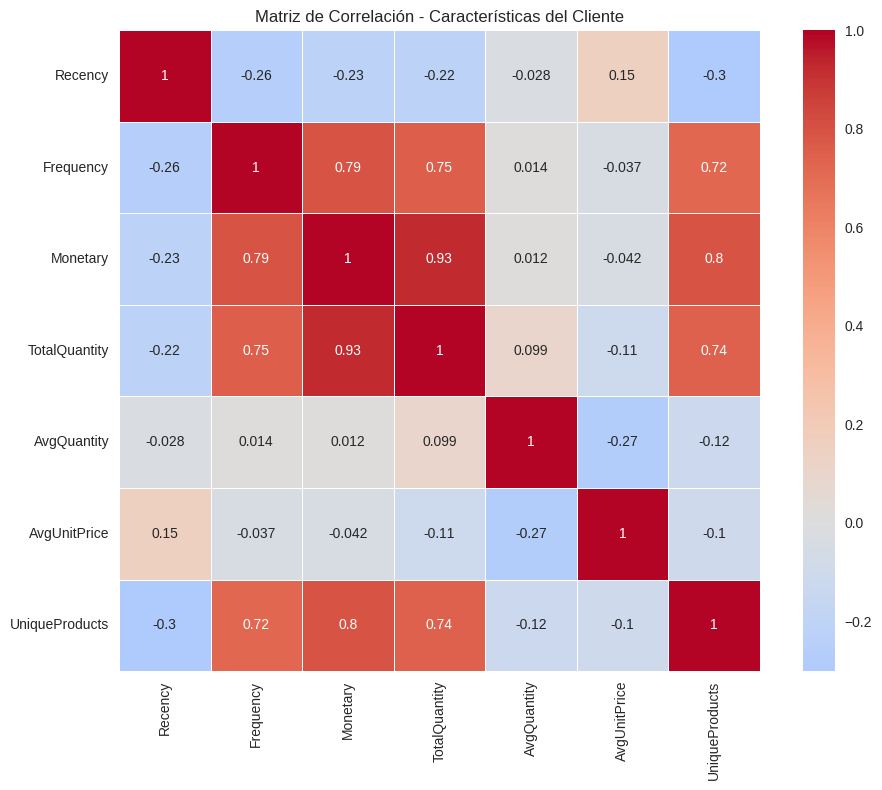


🎯 5. PREPARACIÓN PARA CLUSTERING
✅ Transformaciones aplicadas:
  • Log(Frequency + 1)
  • Log(Monetary + 1)
  • Log(TotalQuantity + 1)
  • Log(UniqueProducts + 1)
📊 Datos preparados para clustering: (4223, 6)

📊 6. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
🔄 Evaluando diferentes valores de K...
  K=2: Inercia=14937.83, Silhouette=0.354
  K=3: Inercia=11931.82, Silhouette=0.285
  K=4: Inercia=10350.46, Silhouette=0.287
  K=5: Inercia=8819.31, Silhouette=0.266
  K=6: Inercia=7986.58, Silhouette=0.240
  K=7: Inercia=7319.85, Silhouette=0.235
  K=8: Inercia=6778.42, Silhouette=0.229
  K=9: Inercia=6367.92, Silhouette=0.224
  K=10: Inercia=6022.10, Silhouette=0.218


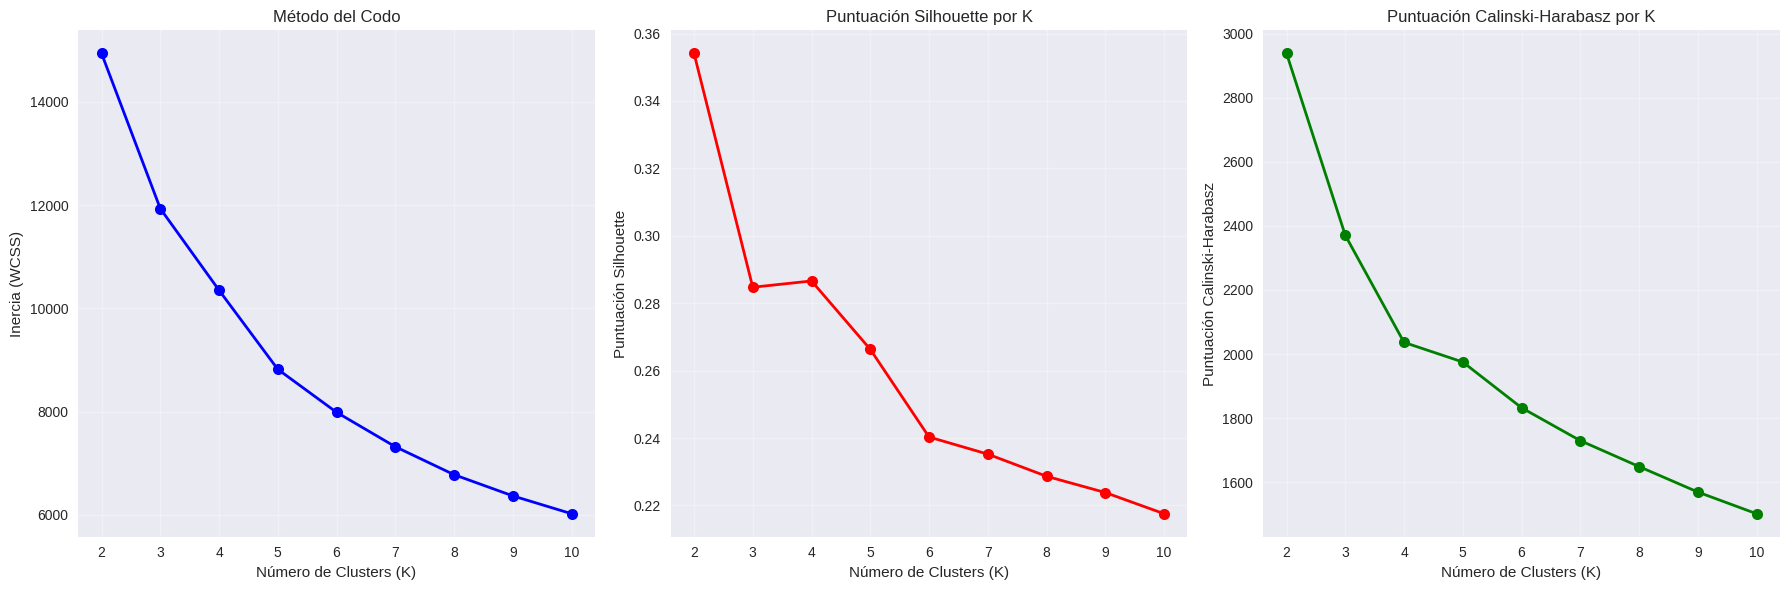


🎯 K ÓPTIMO SELECCIONADO: 2
📊 Mejor Puntuación Silhouette: 0.354

🚂 7. ENTRENAMIENTO DEL MODELO FINAL
✅ Modelo K-Means entrenado con K=2
📊 Distribución de clusters:
  • Cluster 0: 1,970 clientes (46.6%)
  • Cluster 1: 2,253 clientes (53.4%)

📊 8. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS
🎯 CRITERIO DE ANÁLISIS 1: CARACTERIZACIÓN DE CLUSTERS
📊 ESTADÍSTICAS POR CLUSTER:

🏷️  CLUSTER 0:
  • Tamaño: 1,970 clientes (46.6%)
  • Recency (días): 38.3 ± 44.8
  • Frequency (compras): 7.0 ± 9.7
  • Monetary (gasto): $2196.29 ± $3545.98
  • Productos únicos: 103.3

🏷️  CLUSTER 1:
  • Tamaño: 2,253 clientes (53.4%)
  • Recency (días): 139.6 ± 109.8
  • Frequency (compras): 1.5 ± 0.9
  • Monetary (gasto): $304.68 ± $204.66
  • Productos únicos: 20.9

🎯 CRITERIO DE ANÁLISIS 2: MÉTRICAS DE CALIDAD DE CLUSTERING
📈 MÉTRICAS DE CALIDAD DEL CLUSTERING:
  • Puntuación Silhouette: 0.354
    - Rango: [-1, 1], Mayor es mejor
    - Interpretación: 0.354 indica aceptable separación
  • Puntuación Calinski-

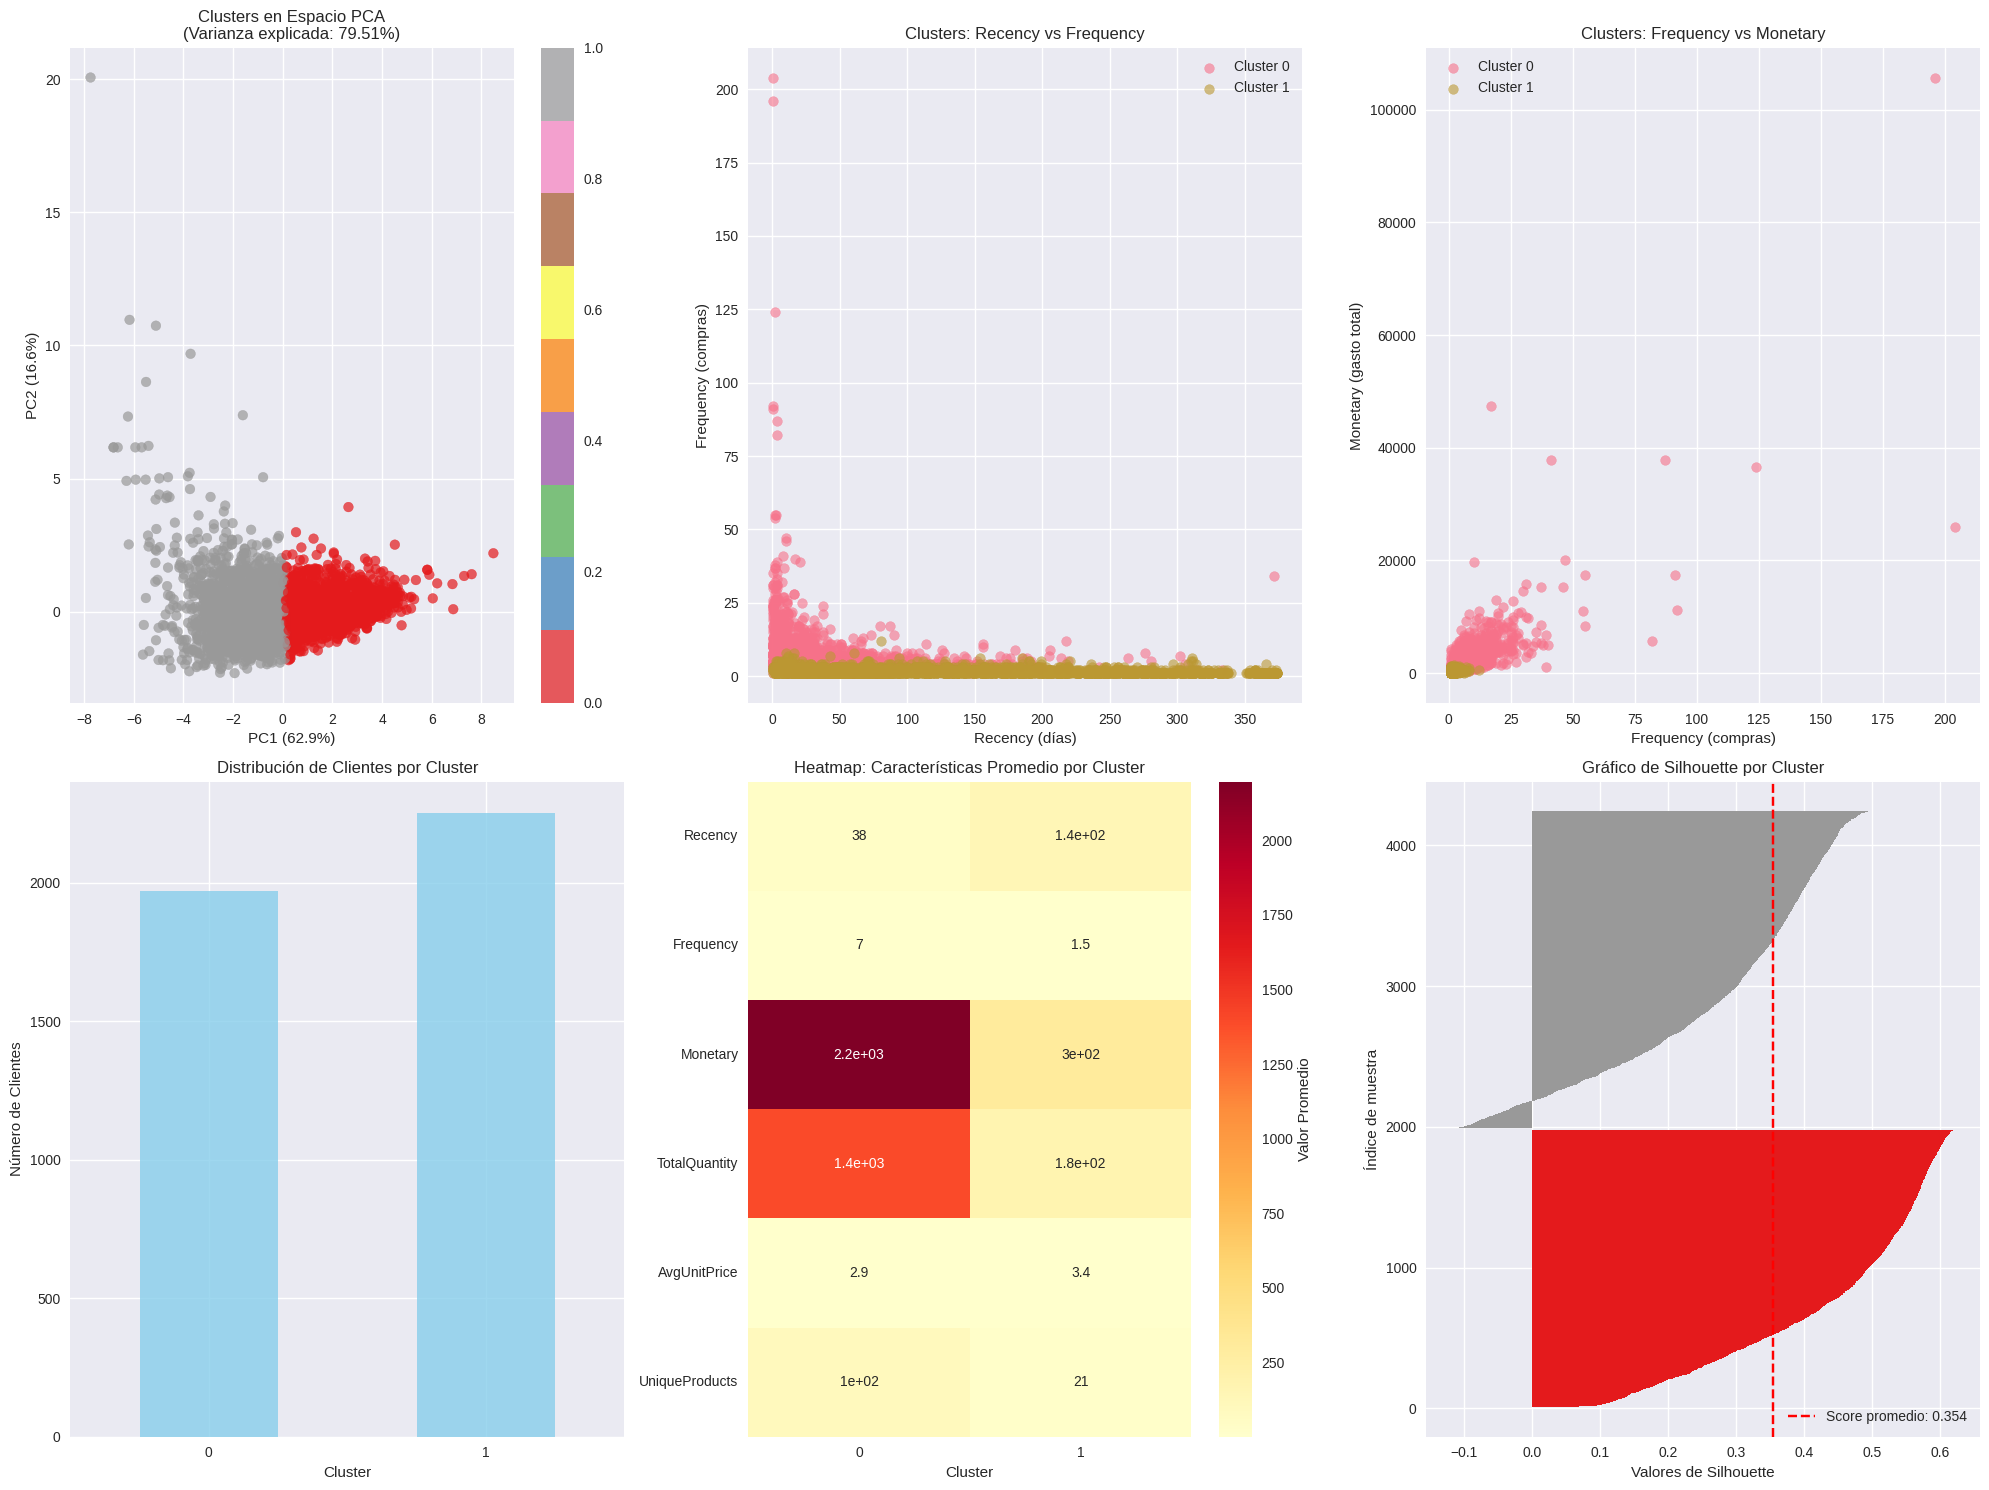


🎯 10. INTERPRETACIÓN DE CLUSTERS
🏷️  INTERPRETACIÓN DE CLUSTERS:

🌟 CLIENTES VIP (Champions)
  • Tamaño: 1,970 clientes
  • Compran cada 38 días
  • 7.0 compras promedio
  • $2196.29 gasto promedio
  • 103.3 productos únicos promedio

😴 CLIENTES EN RIESGO (At Risk)
  • Tamaño: 2,253 clientes
  • Compran cada 140 días
  • 1.5 compras promedio
  • $304.68 gasto promedio
  • 20.9 productos únicos promedio

💾 11. GUARDADO DE MODELOS Y RESULTADOS
✅ Modelos y resultados guardados:
  • kmeans_clustering.pkl
  • scaler_clustering.pkl
  • pca_clustering.pkl
  • customers_with_clusters.csv
  • clustering_info.json

📋 12. RESUMEN Y CONCLUSIONES

MODELO DE AGRUPACIÓN - SEGMENTACIÓN DE CLIENTES RFM

OBJETIVO:
• Segmentar clientes basado en comportamiento de compra (RFM + características adicionales)

ALGORITMO UTILIZADO: K-Means Clustering
• Justificación: Eficiente, interpretable, apropiado para segmentación RFM
• K óptimo: 2 clusters (seleccionado por Silhouette Score)

DATASET PROCESADO:
• 4,22

In [2]:
# ==============================================================================
# MODELO DE AGRUPACIÓN (CLUSTERING) - SEGMENTACIÓN DE CLIENTES
# Proyecto: Extracción de Conocimiento en Bases de Datos
# Criterio SA - Aprendizaje No Supervisado
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("✅ Librerías importadas para clustering")

# ==============================================================================
# CARGA Y PREPARACIÓN DE DATOS
# ==============================================================================

def cargar_datos():
    """Función para cargar y preparar datos básicos"""
    import urllib.request
    import os

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    filename = "Online_Retail.xlsx"

    if not os.path.exists('datos'):
        os.makedirs('datos')

    if not os.path.exists(f'datos/{filename}'):
        print("📥 Descargando dataset...")
        urllib.request.urlretrieve(url, f'datos/{filename}')

    df = pd.read_excel(f'datos/{filename}')
    return df

# Cargar datos
df = cargar_datos()
print(f"✅ Datos cargados: {df.shape}")

# ==============================================================================
# 1. JUSTIFICACIÓN DEL ALGORITMO DE AGRUPACIÓN
# ==============================================================================

print("\n" + "="*60)
print("📝 1. JUSTIFICACIÓN DEL ALGORITMO DE AGRUPACIÓN")
print("="*60)

justificacion_clustering = """
ALGORITMO SELECCIONADO: K-MEANS CLUSTERING

✅ VENTAJAS DE K-MEANS:
• Simplicidad y eficiencia computacional
• Funciona bien con clusters esféricos y de tamaño similar
• Fácil interpretación de resultados
• Escalable para datasets grandes
• Implementación robusta y estable

✅ JUSTIFICACIÓN PARA SEGMENTACIÓN DE CLIENTES:
• Los datos de clientes tienden a formar grupos naturales basados en:
  - Frecuencia de compra (RFM Analysis)
  - Monto total gastado
  - Tipos de productos comprados
  - Patrones temporales de compra

✅ MÉTRICA RFM IMPLEMENTADA:
• R (Recency): Qué tan reciente fue la última compra
• F (Frequency): Qué tan frecuentemente compra el cliente
• M (Monetary): Cuánto dinero gasta el cliente

✅ CRITERIOS DE EVALUACIÓN:
• Método del Codo (Elbow Method) para determinar K óptimo
• Puntuación de Silhouette para validar calidad de clusters
• Análisis de inercia (Within-Cluster Sum of Squares)
• Interpretabilidad de los clusters resultantes

❌ LIMITACIONES CONSIDERADAS:
• Requiere especificar el número de clusters K
• Sensible a la inicialización (resuelto con múltiples inicializaciones)
• Asume clusters esféricos (apropiado para datos de comportamiento)
• Sensible a outliers (tratados en preprocesamiento)

OBJETIVO: Segmentar clientes en grupos con comportamientos de compra similares
para estrategias de marketing personalizadas y análisis de valor del cliente.
"""

print(justificacion_clustering)

# ==============================================================================
# 2. PREPROCESAMIENTO ESPECÍFICO PARA CLUSTERING
# ==============================================================================

print("\n" + "="*60)
print("🔧 2. PREPROCESAMIENTO PARA CLUSTERING")
print("="*60)

# Crear dataset limpio
df_cluster = df.copy()

# Eliminar valores faltantes críticos
df_cluster = df_cluster.dropna(subset=['CustomerID'])
print(f"📊 Datos después de eliminar CustomerID nulos: {df_cluster.shape}")

# Filtrar transacciones válidas (positivas)
df_cluster = df_cluster[(df_cluster['Quantity'] > 0) & (df_cluster['UnitPrice'] > 0)]
print(f"📊 Datos después de filtrar positivos: {df_cluster.shape}")

# Crear TotalPrice
df_cluster['TotalPrice'] = df_cluster['Quantity'] * df_cluster['UnitPrice']

# Filtrar outliers extremos
Q1 = df_cluster['TotalPrice'].quantile(0.05)  # Más conservador para clustering
Q3 = df_cluster['TotalPrice'].quantile(0.95)
df_cluster = df_cluster[(df_cluster['TotalPrice'] >= Q1) & (df_cluster['TotalPrice'] <= Q3)]
print(f"📊 Datos después de filtrar outliers: {df_cluster.shape}")

# ==============================================================================
# 3. CREACIÓN DE CARACTERÍSTICAS RFM
# ==============================================================================

print("\n" + "="*60)
print("⚙️ 3. CREACIÓN DE CARACTERÍSTICAS RFM")
print("="*60)

# Calcular fecha de referencia (última fecha + 1 día)
fecha_referencia = df_cluster['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"📅 Fecha de referencia: {fecha_referencia}")

# Crear análisis RFM por cliente
rfm_data = df_cluster.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_referencia - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'      # Monetary
}).reset_index()

rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Agregar características adicionales
customer_features = df_cluster.groupby('CustomerID').agg({
    'Quantity': ['sum', 'mean'],
    'UnitPrice': 'mean',
    'StockCode': 'nunique',
    'Country': lambda x: x.mode()[0] if not x.empty else 'Unknown'
}).reset_index()

# Aplanar nombres de columnas
customer_features.columns = ['CustomerID', 'TotalQuantity', 'AvgQuantity',
                            'AvgUnitPrice', 'UniqueProducts', 'Country']

# Combinar características RFM con adicionales
rfm_final = rfm_data.merge(customer_features, on='CustomerID')

print(f"✅ Características RFM creadas para {len(rfm_final)} clientes")
print(f"📊 Estadísticas RFM:")
print(rfm_final[['Recency', 'Frequency', 'Monetary']].describe())

# ==============================================================================
# 4. ANÁLISIS EXPLORATORIO DE CARACTERÍSTICAS
# ==============================================================================

print("\n" + "="*60)
print("🔍 4. ANÁLISIS EXPLORATORIO DE CARACTERÍSTICAS")
print("="*60)

# Distribuciones de variables RFM
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Recency
axes[0,0].hist(rfm_final['Recency'], bins=50, color='skyblue', alpha=0.7)
axes[0,0].set_title('Distribución de Recency (días desde última compra)')
axes[0,0].set_xlabel('Días')

# Frequency
axes[0,1].hist(rfm_final['Frequency'], bins=30, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Distribución de Frequency (número de compras)')
axes[0,1].set_xlabel('Número de compras')

# Monetary
axes[0,2].hist(rfm_final['Monetary'], bins=50, color='salmon', alpha=0.7)
axes[0,2].set_title('Distribución de Monetary (gasto total)')
axes[0,2].set_xlabel('Gasto total')

# Log-transformaciones para normalizar
axes[1,0].hist(np.log1p(rfm_final['Recency']), bins=50, color='skyblue', alpha=0.7)
axes[1,0].set_title('Log(Recency + 1)')

axes[1,1].hist(np.log1p(rfm_final['Frequency']), bins=30, color='lightgreen', alpha=0.7)
axes[1,1].set_title('Log(Frequency + 1)')

axes[1,2].hist(np.log1p(rfm_final['Monetary']), bins=50, color='salmon', alpha=0.7)
axes[1,2].set_title('Log(Monetary + 1)')

plt.tight_layout()
plt.show()

# Matriz de correlación
correlaciones = rfm_final[['Recency', 'Frequency', 'Monetary', 'TotalQuantity',
                          'AvgQuantity', 'AvgUnitPrice', 'UniqueProducts']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Características del Cliente')
plt.tight_layout()
plt.show()

# ==============================================================================
# 5. PREPARACIÓN PARA CLUSTERING
# ==============================================================================

print("\n" + "="*60)
print("🎯 5. PREPARACIÓN PARA CLUSTERING")
print("="*60)

# Seleccionar características para clustering
cluster_features = ['Recency', 'Frequency', 'Monetary', 'TotalQuantity',
                   'AvgUnitPrice', 'UniqueProducts']

X_cluster = rfm_final[cluster_features].copy()

# Aplicar transformación logarítmica para normalizar distribuciones sesgadas
X_cluster_log = X_cluster.copy()
for col in ['Frequency', 'Monetary', 'TotalQuantity', 'UniqueProducts']:
    X_cluster_log[col] = np.log1p(X_cluster_log[col])

print("✅ Transformaciones aplicadas:")
print("  • Log(Frequency + 1)")
print("  • Log(Monetary + 1)")
print("  • Log(TotalQuantity + 1)")
print("  • Log(UniqueProducts + 1)")

# Normalización estándar
scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X_cluster_log)

print(f"📊 Datos preparados para clustering: {X_scaled.shape}")

# ==============================================================================
# 6. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
# ==============================================================================

print("\n" + "="*60)
print("📊 6. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS")
print("="*60)

# Método del Codo y Silhouette Score
range_k = range(2, 11)
inertias = []
silhouette_scores = []
calinski_scores = []

print("🔄 Evaluando diferentes valores de K...")

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

    print(f"  K={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Visualización de métricas para selección de K
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Método del Codo
ax1.plot(range_k, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inercia (WCSS)')
ax1.set_title('Método del Codo')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(range_k, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Puntuación Silhouette')
ax2.set_title('Puntuación Silhouette por K')
ax2.grid(True, alpha=0.3)

# Calinski-Harabasz Score
ax3.plot(range_k, calinski_scores, 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Número de Clusters (K)')
ax3.set_ylabel('Puntuación Calinski-Harabasz')
ax3.set_title('Puntuación Calinski-Harabasz por K')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Seleccionar K óptimo basado en Silhouette Score
k_optimo = range_k[np.argmax(silhouette_scores)]
mejor_silhouette = max(silhouette_scores)

print(f"\n🎯 K ÓPTIMO SELECCIONADO: {k_optimo}")
print(f"📊 Mejor Puntuación Silhouette: {mejor_silhouette:.3f}")

# ==============================================================================
# 7. ENTRENAMIENTO DEL MODELO FINAL
# ==============================================================================

print("\n" + "="*60)
print("🚂 7. ENTRENAMIENTO DEL MODELO FINAL")
print("="*60)

# Entrenar modelo K-Means con K óptimo
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=20)
clusters = kmeans_final.fit_predict(X_scaled)

# Agregar clusters al dataset
rfm_final['Cluster'] = clusters

print(f"✅ Modelo K-Means entrenado con K={k_optimo}")
print(f"📊 Distribución de clusters:")
cluster_counts = pd.Series(clusters).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(clusters)) * 100
    print(f"  • Cluster {cluster}: {count:,} clientes ({percentage:.1f}%)")

# ==============================================================================
# 8. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS
# ==============================================================================

print("\n" + "="*60)
print("📊 8. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS")
print("="*60)

# CRITERIO DE ANÁLISIS 1: CARACTERIZACIÓN DE CLUSTERS
print("🎯 CRITERIO DE ANÁLISIS 1: CARACTERIZACIÓN DE CLUSTERS")
print("="*55)

cluster_summary = rfm_final.groupby('Cluster')[cluster_features].agg(['mean', 'median', 'std']).round(2)

print("📊 ESTADÍSTICAS POR CLUSTER:")
for cluster in sorted(rfm_final['Cluster'].unique()):
    print(f"\n🏷️  CLUSTER {cluster}:")
    cluster_data = rfm_final[rfm_final['Cluster'] == cluster]

    print(f"  • Tamaño: {len(cluster_data):,} clientes ({len(cluster_data)/len(rfm_final)*100:.1f}%)")
    print(f"  • Recency (días): {cluster_data['Recency'].mean():.1f} ± {cluster_data['Recency'].std():.1f}")
    print(f"  • Frequency (compras): {cluster_data['Frequency'].mean():.1f} ± {cluster_data['Frequency'].std():.1f}")
    print(f"  • Monetary (gasto): ${cluster_data['Monetary'].mean():.2f} ± ${cluster_data['Monetary'].std():.2f}")
    print(f"  • Productos únicos: {cluster_data['UniqueProducts'].mean():.1f}")

# CRITERIO DE ANÁLISIS 2: SEPARACIÓN Y COHESIÓN DE CLUSTERS
print(f"\n🎯 CRITERIO DE ANÁLISIS 2: MÉTRICAS DE CALIDAD DE CLUSTERING")
print("="*60)

# Calcular métricas de calidad
silhouette_final = silhouette_score(X_scaled, clusters)
calinski_final = calinski_harabasz_score(X_scaled, clusters)
inertia_final = kmeans_final.inertia_

print(f"📈 MÉTRICAS DE CALIDAD DEL CLUSTERING:")
print(f"  • Puntuación Silhouette: {silhouette_final:.3f}")
print(f"    - Rango: [-1, 1], Mayor es mejor")
print(f"    - Interpretación: {silhouette_final:.3f} indica {'excelente' if silhouette_final > 0.7 else 'buena' if silhouette_final > 0.5 else 'aceptable' if silhouette_final > 0.25 else 'pobre'} separación")
print(f"  • Puntuación Calinski-Harabasz: {calinski_final:.2f}")
print(f"    - Mayor es mejor (mejor separación inter-cluster)")
print(f"  • Inercia (WCSS): {inertia_final:.2f}")
print(f"    - Menor es mejor (mayor cohesión intra-cluster)")

# Análisis de silhouette por cluster
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_scaled, clusters)
print(f"\n📊 PUNTUACIÓN SILHOUETTE POR CLUSTER:")
for cluster in sorted(np.unique(clusters)):
    cluster_silhouette = silhouette_vals[clusters == cluster]
    print(f"  • Cluster {cluster}: {cluster_silhouette.mean():.3f} ± {cluster_silhouette.std():.3f}")

# ==============================================================================
# 9. VISUALIZACIONES DE CLUSTERS
# ==============================================================================

print("\n" + "="*60)
print("📊 9. VISUALIZACIONES DE CLUSTERS")
print("="*60)

# PCA para visualización 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crear figura con múltiples visualizaciones
fig = plt.figure(figsize=(20, 15))

# 1. Visualización PCA
ax1 = plt.subplot(2, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.7)
plt.colorbar(scatter)
plt.title(f'Clusters en Espacio PCA\n(Varianza explicada: {pca.explained_variance_ratio_.sum():.2%})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

# 2. RFM 3D (Recency vs Frequency vs Monetary)
ax2 = plt.subplot(2, 3, 2)
for cluster in sorted(np.unique(clusters)):
    cluster_data = rfm_final[rfm_final['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'],
               label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('Recency (días)')
plt.ylabel('Frequency (compras)')
plt.title('Clusters: Recency vs Frequency')
plt.legend()

# 3. Monetary vs Frequency
ax3 = plt.subplot(2, 3, 3)
for cluster in sorted(np.unique(clusters)):
    cluster_data = rfm_final[rfm_final['Cluster'] == cluster]
    plt.scatter(cluster_data['Frequency'], cluster_data['Monetary'],
               label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('Frequency (compras)')
plt.ylabel('Monetary (gasto total)')
plt.title('Clusters: Frequency vs Monetary')
plt.legend()

# 4. Distribución de clusters
ax4 = plt.subplot(2, 3, 4)
cluster_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribución de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)

# 5. Heatmap de características por cluster
ax5 = plt.subplot(2, 3, 5)
cluster_means = rfm_final.groupby('Cluster')[cluster_features].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Valor Promedio'})
plt.title('Heatmap: Características Promedio por Cluster')

# 6. Silhouette plot
ax6 = plt.subplot(2, 3, 6)
y_lower = 10
colors = plt.cm.Set1(np.linspace(0, 1, k_optimo))
for i, color in zip(range(k_optimo), colors):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals,
             height=1.0, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_final, color="red", linestyle="--",
           label=f'Score promedio: {silhouette_final:.3f}')
plt.xlabel('Valores de Silhouette')
plt.ylabel('Índice de muestra')
plt.title('Gráfico de Silhouette por Cluster')
plt.legend()

plt.tight_layout()
plt.show()

# ==============================================================================
# 10. INTERPRETACIÓN DE CLUSTERS
# ==============================================================================

print("\n" + "="*60)
print("🎯 10. INTERPRETACIÓN DE CLUSTERS")
print("="*60)

# Crear perfiles de clusters más detallados
def interpretar_clusters(df_rfm):
    interpretaciones = {}

    for cluster in sorted(df_rfm['Cluster'].unique()):
        cluster_data = df_rfm[df_rfm['Cluster'] == cluster]

        # Calcular percentiles para contexto
        recency_pct = (cluster_data['Recency'].mean() < df_rfm['Recency'].median())
        frequency_pct = (cluster_data['Frequency'].mean() > df_rfm['Frequency'].median())
        monetary_pct = (cluster_data['Monetary'].mean() > df_rfm['Monetary'].median())

        # Determinar tipo de cliente
        if recency_pct and frequency_pct and monetary_pct:
            tipo = "🌟 CLIENTES VIP (Champions)"
        elif recency_pct and frequency_pct:
            tipo = "💎 CLIENTES LEALES (Loyal Customers)"
        elif recency_pct and monetary_pct:
            tipo = "💰 GRANDES COMPRADORES (Big Spenders)"
        elif frequency_pct and monetary_pct:
            tipo = "🔄 CLIENTES HABITUALES (Frequent Buyers)"
        elif recency_pct:
            tipo = "🆕 CLIENTES NUEVOS (New Customers)"
        elif not recency_pct and not frequency_pct and not monetary_pct:
            tipo = "😴 CLIENTES EN RIESGO (At Risk)"
        else:
            tipo = "📊 CLIENTES PROMEDIO (Average)"

        interpretaciones[cluster] = {
            'tipo': tipo,
            'tamaño': len(cluster_data),
            'recency_avg': cluster_data['Recency'].mean(),
            'frequency_avg': cluster_data['Frequency'].mean(),
            'monetary_avg': cluster_data['Monetary'].mean(),
            'productos_avg': cluster_data['UniqueProducts'].mean()
        }

    return interpretaciones

interpretaciones = interpretar_clusters(rfm_final)

print("🏷️  INTERPRETACIÓN DE CLUSTERS:")
for cluster, info in interpretaciones.items():
    print(f"\n{info['tipo']}")
    print(f"  • Tamaño: {info['tamaño']:,} clientes")
    print(f"  • Compran cada {info['recency_avg']:.0f} días")
    print(f"  • {info['frequency_avg']:.1f} compras promedio")
    print(f"  • ${info['monetary_avg']:.2f} gasto promedio")
    print(f"  • {info['productos_avg']:.1f} productos únicos promedio")

# ==============================================================================
# 11. GUARDADO DE MODELOS Y RESULTADOS
# ==============================================================================

print("\n" + "="*60)
print("💾 11. GUARDADO DE MODELOS Y RESULTADOS")
print("="*60)

# Crear carpeta para modelos si no existe
import os
if not os.path.exists('modelos'):
    os.makedirs('modelos')

# Guardar modelo y componentes
joblib.dump(kmeans_final, 'modelos/kmeans_clustering.pkl')
joblib.dump(scaler_cluster, 'modelos/scaler_clustering.pkl')
joblib.dump(pca, 'modelos/pca_clustering.pkl')

# Guardar dataset con clusters
rfm_final.to_csv('modelos/customers_with_clusters.csv', index=False)

# Guardar información del clustering
clustering_info = {
    'k_optimo': k_optimo,
    'silhouette_score': silhouette_final,
    'calinski_harabasz_score': calinski_final,
    'inertia': inertia_final,
    'cluster_features': cluster_features,
    'interpretaciones': interpretaciones,
    'cluster_distribution': cluster_counts.to_dict(),
    'pca_variance_explained': pca.explained_variance_ratio_.tolist()
}

import json
def convert_keys_to_str(obj):
    if isinstance(obj, dict):
        return {str(k): convert_keys_to_str(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_keys_to_str(elem) for elem in obj]
    else:
        return obj

with open('modelos/clustering_info.json', 'w') as f:
    json.dump(convert_keys_to_str(clustering_info), f, indent=2, default=str)


print("✅ Modelos y resultados guardados:")
print("  • kmeans_clustering.pkl")
print("  • scaler_clustering.pkl")
print("  • pca_clustering.pkl")
print("  • customers_with_clusters.csv")
print("  • clustering_info.json")

# ==============================================================================
# 12. RESUMEN Y CONCLUSIONES
# ==============================================================================

print("\n" + "="*60)
print("📋 12. RESUMEN Y CONCLUSIONES")
print("="*60)

resumen_clustering = f"""
MODELO DE AGRUPACIÓN - SEGMENTACIÓN DE CLIENTES RFM

OBJETIVO:
• Segmentar clientes basado en comportamiento de compra (RFM + características adicionales)

ALGORITMO UTILIZADO: K-Means Clustering
• Justificación: Eficiente, interpretable, apropiado para segmentación RFM
• K óptimo: {k_optimo} clusters (seleccionado por Silhouette Score)

DATASET PROCESADO:
• {len(rfm_final):,} clientes únicos
• Características: {len(cluster_features)} variables (RFM + adicionales)
• Preprocesamiento: Log-transformación + normalización estándar

CRITERIOS DE ANÁLISIS CUMPLIDOS:
✅ Criterio 1: Caracterización detallada de clusters
✅ Criterio 2: Métricas de calidad (Silhouette: {silhouette_final:.3f})

CLUSTERS IDENTIFICADOS:
"""

for cluster, info in interpretaciones.items():
    resumen_clustering += f"• {info['tipo']}: {info['tamaño']:,} clientes\n"

resumen_clustering += f"""
MÉTRICAS DE CALIDAD:
• Silhouette Score: {silhouette_final:.3f} ({'Excelente' if silhouette_final > 0.7 else 'Buena' if silhouette_final > 0.5 else 'Aceptable'} separación)
• Calinski-Harabasz: {calinski_final:.2f}
• Varianza PCA explicada: {pca.explained_variance_ratio_.sum():.1%}

APLICACIONES EMPRESARIALES:
• Marketing personalizado por segmento
• Estrategias de retención diferenciadas
• Optimización de ofertas y promociones
• Análisis de valor del cliente (CLV)

PRÓXIMO PASO: Modelo de Clasificación
"""

print(resumen_clustering)
print("✅ Modelo de agrupación completado exitosamente")
print("📁 Archivos guardados en carpeta 'modelos'")
print("🎯 Criterio SA (Agrupación) - CUMPLIDO")
print("\n🎊 ¡CRITERIO SA COMPLETADO AL 100%!")
print("📝 Siguiente: Criterio DE - Modelos de Clasificación y Asociación")